In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
data = pd.read_csv('../auto-mpg.csv')
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [14]:
data["mpg"] = data["mpg"].fillna(method="ffill")

In [15]:
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [5]:
#data.dropna(axis=0, how="any")

#data.fillna(0)

# data["mpg"] = data["mpg"].fillna(0)
# data["horsepower"] = data["horsepower"].fillna(0)

#data["mpg"].fillna(data["age"].mean())

#data["mpg"].fillna((method="ffill"))
#data["mpg"].fillna((method="backfill"))

In [16]:
data["horsepower"] = data["horsepower"].fillna(method="ffill")

In [17]:
data.tail(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
376,27.0,4,112.0,88.0,2640,18.6,82,1,chevrolet cavalier wagon
377,34.0,4,112.0,88.0,2395,18.0,82,1,chevrolet cavalier 2-door
378,31.0,4,112.0,85.0,2575,16.2,82,1,pontiac j2000 se hatchback
379,29.0,4,135.0,84.0,2525,16.0,82,1,dodge aries se
380,27.0,4,151.0,90.0,2735,18.0,82,1,pontiac phoenix
381,24.0,4,140.0,92.0,2865,16.4,82,1,ford fairmont futura
382,23.0,4,151.0,92.0,3035,20.5,82,1,amc concord dl
383,36.0,4,105.0,74.0,1980,15.3,82,2,volkswagen rabbit l
384,37.0,4,91.0,68.0,2025,18.2,82,3,mazda glc custom l
385,31.0,4,91.0,68.0,1970,17.6,82,3,mazda glc custom


(array([60., 48., 40., 46., 43., 34., 34., 36., 33., 32.]),
 array([  0. ,  31.1,  62.2,  93.3, 124.4, 155.5, 186.6, 217.7, 248.8,
        279.9, 311. ]),
 <BarContainer object of 10 artists>)

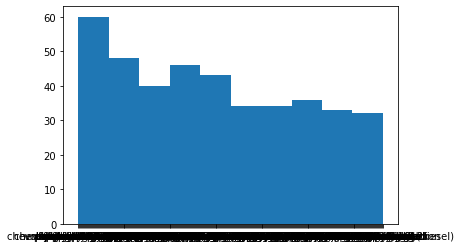

In [18]:
plt.hist(data['car name'])

In [19]:
colnames = data.columns.values.tolist()
predictors = colnames[:8]
target = colnames[8]

In [20]:
data["is_train"] = (np.random.uniform(0, 1, len(data)) <= 0.8).astype(int)

(array([ 91.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

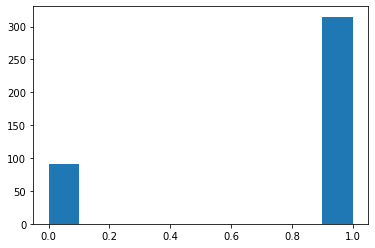

In [21]:
plt.hist(data.is_train)

In [23]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [25]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [26]:
preds = tree.predict(test[predictors])

In [27]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,amc ambassador dpl,amc concord,amc gremlin,amc matador,amc pacer,audi 100ls,audi 4000,buick century 350,chevrolet chevette,chevrolet impala,...,datsun 710,dodge aspen,ford ltd,ford pinto,peugeot 504,plymouth reliant,pontiac catalina,toyota corolla,toyota corona,volkswagen dasher
Actual,,,,,,,,,,,,,,,,,,,,,
amc ambassador brougham,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
amc concord dl,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amc concord dl 6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amc pacer d/l,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amc rebel sst,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volkswagen rabbit custom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
volkswagen super beetle 117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
volvo 244dl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
